In [1]:
# 라이브러리 호출
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

In [2]:
# MAT 파일 불러오기
mat_path = r"../HW3_package/hw3_prob3.mat"
mat_data = scipy.io.loadmat(mat_path)

A = mat_data['A']
b = mat_data['b']
x_orig = mat_data['x_orig']

In [3]:
def normest_numpy(A):
    """
    NumPy를 이용하여 행렬 A의 2-노름을 추정하는 함수.
    """
    # SVD를 계산합니다. full_matrices=False로 설정하여 경제적 SVD를 수행합니다.
    U, s, V = scipy.sparse.linalg.svds(A)
    # 가장 큰 특이값 반환
    return s[0]

def Dh(u):
    rows, cols = u.shape
    d = np.zeros((rows, cols))
    d[:, 1:cols] = u[:, 1:cols] - u[:, 0:cols-1]
    d[:, 0] = u[:, 0] - u[:, cols-1]
    return d

def Dht(u):
    rows, cols = u.shape
    d = np.zeros((rows, cols))
    d[:, 0:cols-1] = u[:, 0:cols-1] - u[:, 1:cols]
    d[:, cols-1] = u[:, cols-1] - u[:, 0]
    return d

def Dv(u):
    rows, cols = u.shape
    d = np.zeros((rows, cols))
    d[1:rows, :] = u[1:rows, :] - u[0:rows-1, :]
    d[0, :] = u[0, :] - u[rows-1, :]
    return d

def Dvt(u):
    rows, cols = u.shape
    d = np.zeros((rows, cols))
    d[0:rows-1, :] = u[0:rows-1, :] - u[1:rows, :]
    d[rows-1, :] = u[rows-1, :] - u[0, :]
    return d

In [4]:
mu = 1
stopping_point = 5e-5

# # normest를 이용해 tau와 sigma 계산
norm_est = normest_numpy(A)
tau = 1 / norm_est**2
sigma = 1 / (tau * norm_est**2)

theta = 1/np.sqrt(1 + 2 * mu)

In [9]:
y1 = np.zeros(b.shape)
y2 = np.zeros((256,256))
y3 = np.zeros((256,256))
x = np.zeros((256,256))

for idx in range(10000):
    
    y2 = Dh(x)
    y3 = Dv(x)
    
    # update y
    y2[np.abs(linalg.inv(sigma) * y2 + x) < linalg.inv(sigma)] = 0
    y3[np.abs(linalg.inv(sigma) * y3 + x) < linalg.inv(sigma)] = 0
    
    x = x.reshape(65536, 1)
    y1 = ((linalg.inv(sigma) * y1 + A @ x) - (mu * b/ sigma)) / (1 + mu / sigma)    
    
    # update x
    x_minus1 = x

    y2 = y2.reshape(65536, 1)
    y3 = y3.reshape(65536, 1)
    
    x = x - (tau * (A.T @ y1 + y2 + y3))
    x[x < 0] = 0
        

    x = x + theta * (x - x_minus1)

    x = x.reshape(256,256)
    y2 = y2.reshape(256,256)
    y3 = y3.reshape(256,256)
    x_minus1 = x_minus1.reshape(256,256)
    
    print(idx)
    if (np.linalg.norm((x - x_minus1), 2) / np.linalg.norm(x, 2)) < stopping_point:
        break

[]
0
[6.52144718 1.37102859 0.73400076 ... 2.26296738 1.03017905 1.86745889]
1
[0.84798139 1.51123999 6.81563224 ... 0.78266706 1.27299602 1.4217186 ]
2
[2.06626883 0.72762982 1.88489219 ... 2.41315535 0.72479602 1.07143709]
3
[5.08517107 1.39348052 1.34634541 ... 0.85698757 1.58229985 1.724236  ]
4
[1.45880518 0.61090098 0.51295893 ... 2.10545921 0.69316783 0.73494501]
5
[0.60601983 0.93442238 4.39104272 ... 0.92525467 1.01151733 1.12444888]
6
[1.1078163  1.24912246 0.53064401 ... 4.13615759 5.89867559 1.25689521]
7
[1.05774482 0.78349542 0.55313863 ... 0.72175682 0.78897116 0.67698228]
8
[ 0.52755213  1.37517512  0.86997148 ... 10.42902613  9.31670566
  1.63204669]
9
[ 1.19926481  0.65790788  0.60995408 ... 10.49028755  0.74634357
  0.60398769]
10
[ 0.91687358 17.24401679 12.88963101 ... 11.75882913  0.81454467
  0.54401556]
11
[21.67329486 12.53151202 11.14622039 ...  5.40966573 16.96385527
 12.59149911]
12
[21.40438472 11.96125659 10.82778487 ... 18.48834446 13.33358011
  0.9792994

[39.20639328 17.24208378  7.43644949 ... 13.17348681 67.87417805
 58.08994744]
106
[39.15826492 17.02495557  7.49270357 ... 13.26677194 67.41335163
 57.76345188]
107
[39.10795711 16.81296996  7.54571659 ... 13.36116659 66.95696279
 57.43415012]
108
[39.0552561  16.60603511  7.59535134 ... 13.45596714 66.50509643
 57.10289187]
109
[39.00063823 16.4042234   7.64179139 ... 13.55094418 66.05788493
 56.76963568]
110
[38.94436575 16.20746816  7.6851838  ... 13.64622903 65.61534431
 56.43514416]
111
[38.88652288 16.01527955  7.72577    ... 13.74173306 65.17768006
 56.09869927]
112
[38.82725755 15.82777527  7.76324063 ... 13.83738355 64.74498461
 55.75848398]
113
[38.76700817 15.64503591  7.79758968 ... 13.93311011 64.3170725
 55.41481199]
114
[38.70597759 15.46713068  7.82790745 ... 14.02886785 63.89395909
 55.06778848]
115
[38.64410068 15.29403408  7.85395591 ... 14.12450639 63.47536035
 54.71761775]
116
[38.58184594 15.12591775  7.87601188 ... 14.21981919 63.06154116
 54.36483587]
117
[38.5

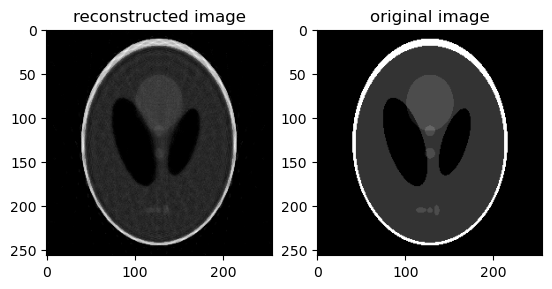

In [6]:
# original f 
x = x.reshape((256, 256))
plt.subplot(121)
plt.imshow(x.T, cmap = "gray")
plt.title( label = "reconstructed image")

 
x = x.reshape((256, 256))
plt.subplot(122)
plt.imshow(x_orig, cmap = "gray")
plt.title( label = "original image")

plt.show()